In [2]:
#Julia code to  obtain Cv-electronic as a function of temperature
#Some preliminary packages to enable plotting and display them in the notebook
ENV["GRDIR"]=""
Pkg.build("GR")

   Building GR → `C:\Users\SURYA\.juliapro\JuliaPro_v1.4.0-1\packages\GR\KbH88\deps\build.log`


In [3]:
#add the plots package
Pkg.add("Plots")

   Updating registry at `C:\Users\SURYA\.juliapro\JuliaPro_v1.4.0-1\registries\JuliaPro`
  Resolving package versions...
   Updating `C:\Users\SURYA\.juliapro\JuliaPro_v1.4.0-1\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\SURYA\.juliapro\JuliaPro_v1.4.0-1\environments\v1.4\Manifest.toml`
 [no changes]


In [36]:
#use the plots package
using Plots
gr()

Plots.GRBackend()

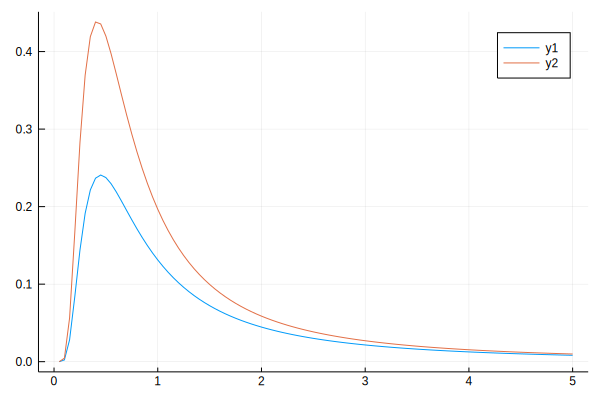

In [37]:
R = 8.314; #the value of the universal gas constant
d_ratio = 0.5; #ratio of the dengerate states
t = 0:0.05:5;
C_v_by_R = d_ratio.*((1 ./ t).^2).*(exp.(-(1 ./ t))) ./ (1 .+ d_ratio.*exp.(-(1 ./ t))).^2;
plot(t,C_v_by_R);
d_ratio = 1;
C_v_by_R = d_ratio.*((1 ./ t).^2).*(exp.(-(1 ./ t))) ./ (1 .+ d_ratio.*exp.(-(1 ./ t))).^2;
display(plot!(t,C_v_by_R));

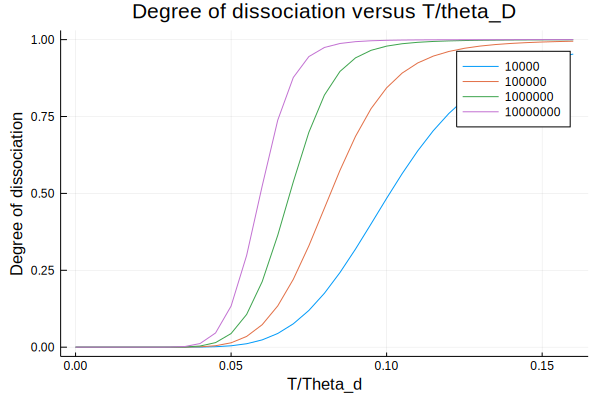

In [112]:
#To include dissociation effects
R_A2 = 8.314/28; #the molar gas constant for a specific gas
t = 0:0.005:0.16; #here t = T/theta_d, theta_d being the dissociation temperature
plot();
xlabel!("T/Theta_d");
ylabel!("Degree of dissociation");
for i = 4:7
    rho_r = 10^i;
    k = rho_r.*exp.(-1 ./ t);
    alpha_star = (-k .+ sqrt.(k.^2 .+ 4 .* k)) ./ 2;
    plot!(t,alpha_star, title = "Degree of dissociation versus T/theta_D", label = rho_r);
end
display(plot!());

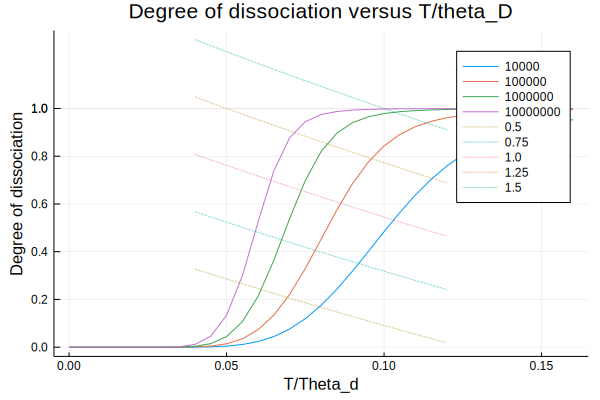

In [113]:
#Generating the constant enthalpy lines on the alpha plot
T = 0.04:0.005:0.12;
for i = 1:5
    h_c = 0.5 +(i-1)*0.25;
    alpha_star = (h_c .- 4 .*T) ./ (1 .+ T);
    plot!(T,alpha_star, linestyle = :dot, label = h_c);
end
display(plot!());
#Dotted lines indicate lines of constant enthalpy

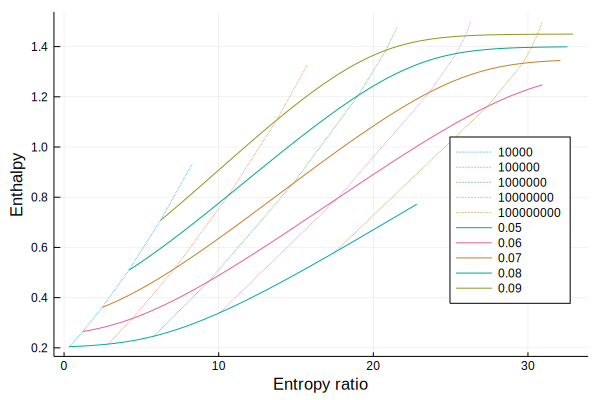

In [114]:
#Let's generate the mollier diagram for this
plot();
xlabel!("Entropy ratio");
ylabel!("Enthalpy");
#first fix rho each time;
t = 0.05:0.01:0.1;
for i = 4:8
    rho_r = 10^i;
    k = rho_r.*exp.(-1 ./ t);
    alpha_star = (-k .+ sqrt.(k.^2 .+ 4 .* k)) ./ 2;
    h = (4 .+ alpha_star).*t + alpha_star;
    s = 3 .*log.(t) + alpha_star.*(1 .- 2 .*log.(alpha_star)) .- (1 .- alpha_star).*log.(1 .- alpha_star) .+ (1 .+ alpha_star).*log(rho_r)
    plot!(s,h, linestyle = :dot, label = rho_r,legend = :none);
end   
#next fix t each time;
rho_r= 4:0.005:8.5;
for i = 1:5
    t = (i-1)*0.01 + 0.05;
    k = (10 .^rho_r).*exp(-1/t);
    alpha_star = (-k .+ sqrt.(k.^2 .+ 4 .* k)) ./ 2;
    h = (4 .+ alpha_star).*t + alpha_star;
    s = 3 .*log(t) .+ alpha_star.*(1 .- 2 .*log.(alpha_star)) .- (1 .- alpha_star).*log.(1 .- alpha_star) .+ (1 .+ alpha_star).*log(10).*(rho_r);
    if i==2;
            plot!(s,h, label = 0.06, legend = :none);
    else
    plot!(s,h, label = t, legend = :right);
    end
end
display(plot!());    

In [122]:
#for the sake of clarity I have turned of legends for the above plots and retained them for the ones that follow
#to view the corresponding legends just replace "legend= :none" to "legend = :bottomright" (or the position that you desire)
#fix pressure this time
t = 0.05:0.01:0.1;
for i = 1:5
    logc_p = (i-1)*0.5 + 5.5;
    alpha_star = ((10^(-logc_p)) ./ t) .- 1;
    h = (4 .+ alpha_star).*t .+ alpha_star;
    s = 3 .*log.(t) .+ alpha_star.*(1 .- 2 .*log.(alpha_star)) .- (1 .- alpha_star).*log.(1 .- alpha_star) .+ (1 .+ alpha_star).*log.((alpha_star.^2/(1 .- alpha_star)).*exp.(1 ./ t));
    plot!(s,h, label = t, legend = :right);
    end
end
display(plot!()); 

DomainError: DomainError with -0.9999367544467966:
log will only return a complex result if called with a complex argument. Try log(Complex(x)).